In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Read csv file...
r = pd.read_csv('AG_NO3_fill_cells_remove_NAN.csv').dropna()
#...create label column...
r['label'] = 0
#...change 'Student_Flag' to int to compare to label...
r['Student_Flag'] = r['Student_Flag'].astype(int)
#...set window size and quotient...
window = 100
q = 97.5
#...label the first window of data points...
threshold = np.percentile(r['NO3N'][0:window],q)
#threshold = np.mean(r['NO3N'][0:window])
for i in range(window):
    if r['NO3N'][i] > threshold:
        r.loc[i,'label'] = 1
        
for i in range(window, len(r)):
    #...update threshold from [0,999] to [1,1000], or one step forward until the end...
    threshold = np.percentile(r['NO3N'][i-(window-1):i],q)
    #...label data point...
    if r['NO3N'][i] >= threshold:
        r.loc[i,'label'] = 1
        
anomalies = [x for x in r['label'] if x == 1]
print('Anomalies Detected: ' + str(len(anomalies)))

normal_events = [x for x in r['Student_Flag'] if x == 0]
print('Normal Events: ' + str(len(normal_events)))

student_flags = [x for x in r['Student_Flag'] if x == 1]
print('Student Flags: ' + str(len(student_flags)))

TP = np.zeros(len(r))
for i, row in r.iterrows():
    if row['label'] == 1:
        if row['Student_Flag'] == 1: 
            TP[i] = row['NO3N']
        
tps = [x for x in TP if x > 0]   
print('True positives: ' + str(len(tps)))

print('Correct Anomaly Detection Rate: ' + str(len(tps)/len(student_flags))) #correct anomaly detection rate
print('Correct Normal Event Detection Rate: ' + str((len(r)-len(anomalies))/len(normal_events)))#correct normal detection cases/total normal cases

Anomalies Detected: 1213
Normal Events: 15731
Student Flags: 77
True positives: 60
Correct Anomaly Detection Rate: 0.7792207792207793
Correct Normal Event Detection Rate: 0.9277859004513381


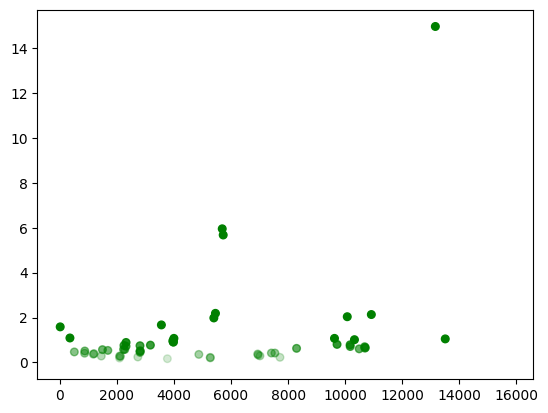

In [2]:
plt.scatter(range(len(r)),TP[:],c="green", s=30, alpha=np.clip(TP[:],0,1))
plt.show()